# Exploratory Data Analysis (EDA) on FRED Economic Data

## Project Overview
This project explores economic indicators from the FRED (Federal Reserve Economic Data) database. The goal is to analyze trends in key financial metrics over time, including GDP, inflation rates, unemployment rates, and interest rates. The analysis will provide insights into the economic trends and correlations between these indicators.

## Analysis Overview
This analysis includes:
- **Data Cleaning and Preprocessing**: Handling missing values, checking data types, and ensuring data consistency.
- **Exploratory Data Analysis (EDA)**: Visualizing and understanding the trends in key economic indicators.
- **Trend Analysis of Key Economic Indicators**: Analyzing changes in GDP, inflation rates, unemployment rates, and interest rates over time.
- **Key Findings and Insights**: Summarizing the insights gained from the analysis.

## Data Cleaning and Preprocessing
The first step in the analysis is to clean and preprocess the data. This involves handling missing values, ensuring data types are correct, and making sure the data is consistent across different sources.

## Exploratory Data Analysis (EDA)

### GDP Trends Over Time
We start by analyzing the changes in Gross Domestic Product (GDP) across different periods. GDP is a key indicator of economic health, and understanding its trends can provide insights into the overall economic performance.

### Inflation Rate Analysis
Next, we examine inflation patterns and their economic impact. Inflation rates can influence monetary policy, consumer spending, and investment decisions.

### Unemployment Rate Trends
Understanding labor market fluctuations over the years is crucial. We analyze unemployment rate trends to gain insights into the labor market's health and its impact on the economy.

### Interest Rate Movements
Interest rates are a critical component of monetary policy. We investigate how interest rates have changed over time and their effect on the economy.

### Correlation Between Economic Indicators
Finally, we explore the relationships between GDP, inflation, unemployment, and interest rates. Understanding these correlations can help in making informed economic decisions.

## Data Collection and Initial Setup
We begin by importing the necessary libraries and setting up the environment for data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('fivethirtyeight')
from fredapi import Fred

In [2]:
pd.set_option('display.max_columns',500)

In [3]:
color_pal=plt.rcParams["axes.prop_cycle"].by_key()['color']

In [4]:
fred_key="Fred api Key"

In [5]:
fred=Fred(api_key=fred_key)

In [6]:
s2=fred.search('S&P')
s2

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CSUSHPINSA,CSUSHPINSA,2024-11-24,2024-11-24,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-10-29 08:11:02-05:00,88,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2024-11-24,2024-11-24,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2024-10-29 08:11:03-05:00,78,"For more information regarding the index, plea..."
SP500,SP500,2024-11-24,2024-11-24,S&P 500,2014-11-24,2024-11-22,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-11-22 19:11:30-06:00,83,The observations for the S&P 500 represent the...
SPCS20RSA,SPCS20RSA,2024-11-24,2024-11-24,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2024-10-29 08:11:05-05:00,67,"For more information regarding the index, plea..."
SPCS20RNSA,SPCS20RNSA,2024-11-24,2024-11-24,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-10-29 08:11:40-05:00,33,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRDQARAPABIS,CRDQARAPABIS,2024-11-24,2024-11-24,"Total Credit to Private Non-Financial Sector, ...",1940-04-01,2024-01-01,"Quarterly, End of Quarter",Q,Billions of Argentine Pesos,Bil. of Argentine Pesos,Not Seasonally Adjusted,NSA,2024-09-16 13:03:28-05:00,1,"Credit is provided by domestic banks, all othe..."
QARPAMUSDA,QARPAMUSDA,2024-11-24,2024-11-24,"Total Credit to Private Non-Financial Sector, ...",1990-01-01,2024-01-01,"Quarterly, End of Quarter",Q,Billions of US Dollars,Bil. of US $,Not Seasonally Adjusted,NSA,2024-09-16 13:02:16-05:00,1,"Credit is provided by domestic banks, all othe..."
QCOPAMXDCA,QCOPAMXDCA,2024-11-24,2024-11-24,"Total Credit to Private Non-Financial Sector, ...",1996-10-01,2024-01-01,"Quarterly, End of Quarter",Q,Billions of Argentine Pesos,Bil. of Argentine Pesos,Not Seasonally Adjusted,NSA,2024-09-16 13:03:38-05:00,1,"Credit is provided by domestic banks, all othe..."


<Axes: title={'center': 'S&P 500'}>

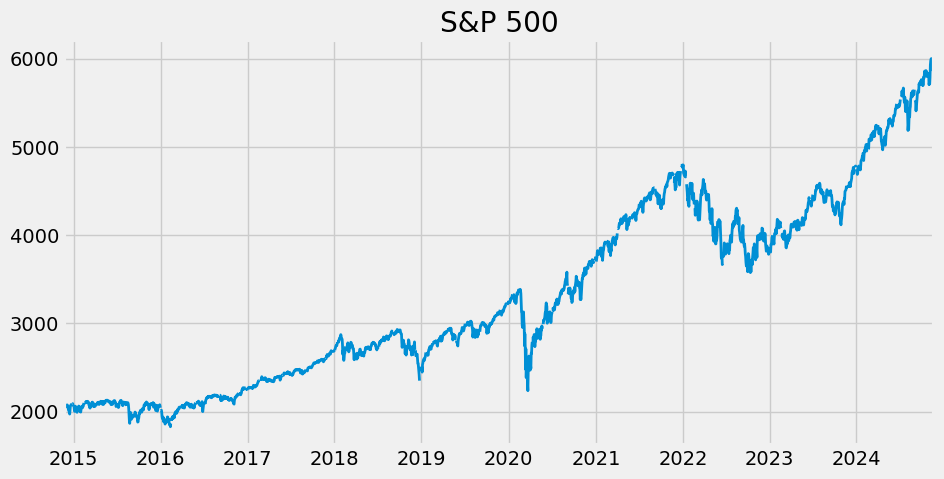

In [7]:
sp500=fred.get_series(series_id='sp500')
sp500.plot(figsize=(10,5),title="S&P 500",lw=2)

In [275]:
unemp=fred.search("unemployment rate state",filter=("frequency","Monthly"))

In [276]:
df1=unemp[(unemp["seasonal_adjustment"]=="Seasonally Adjusted")&(unemp["units"]=="Percent")]
unemp=fred.search("unemployment rate state",filter=("frequency","Monthly"))

In [14]:
df1.shape

(158, 15)

In [15]:
df2=unemp.loc[(unemp["seasonal_adjustment"]=="Seasonally Adjusted") & (unemp["units"]=="Percent")]

In [16]:
df2.shape

(158, 15)

In [17]:
df3=unemp.query('seasonal_adjustment ==  "Seasonally Adjusted" & units=="Percent"')
df3.shape

(158, 15)

In [277]:
df=df1[df1["title"].str.contains("Unemployment Rate in")]

In [278]:
df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2024-11-24,2024-11-24,Unemployment Rate in California,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:02-06:00,64,None
TXUR,TXUR,2024-11-24,2024-11-24,Unemployment Rate in Texas,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:49:03-06:00,56,None
NYUR,NYUR,2024-11-24,2024-11-24,Unemployment Rate in New York,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:03-06:00,53,None
FLUR,FLUR,2024-11-24,2024-11-24,Unemployment Rate in Florida,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:03-06:00,51,None
PAUR,PAUR,2024-11-24,2024-11-24,Unemployment Rate in Pennsylvania,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:49:04-06:00,44,None
OHUR,OHUR,2024-11-24,2024-11-24,Unemployment Rate in Ohio,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:04-06:00,41,None
MIUR,MIUR,2024-11-24,2024-11-24,Unemployment Rate in Michigan,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:05-06:00,38,None
ALUR,ALUR,2024-11-24,2024-11-24,Unemployment Rate in Alabama,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:04-06:00,38,None
MAUR,MAUR,2024-11-24,2024-11-24,Unemployment Rate in Massachusetts,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:05-06:00,37,None


In [245]:

df.shape

(98, 15)

In [36]:
unr=fred.get_series(series_id="UNRATE") 

In [433]:
all_results=[]
for myid in df.index:
    results=fred.get_series(myid)
    results=results.to_frame(name=myid)
    all_results.append(results)

In [435]:
unemp_res=pd.concat(all_results,axis=1)

In [436]:
unemp_res.columns.value_counts().sum()

59

In [437]:
unemp_res.columns

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR',
       'NEUR', 'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'RIUR', 'KSUR',
       'WYUR', 'DEUR', 'VTUR', 'SDUR', 'CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR',
       'CNEWUR'],
      dtype='object')

In [438]:
l1=['LASMT261982000000003','LASMT391746000000003']

In [439]:
unemp_res=unemp_res.drop(l1,axis=1)

In [440]:
unemp_res.isnull().sum(axis=1)

1976-01-01    0
1976-02-01    0
1976-03-01    0
1976-04-01    0
1976-05-01    0
             ..
2024-06-01    0
2024-07-01    0
2024-08-01    0
2024-09-01    0
2024-10-01    0
Freq: MS, Length: 586, dtype: int64

In [441]:
unemp_res=unemp_res.dropna()

In [354]:
unemp_res.shape

(584, 57)

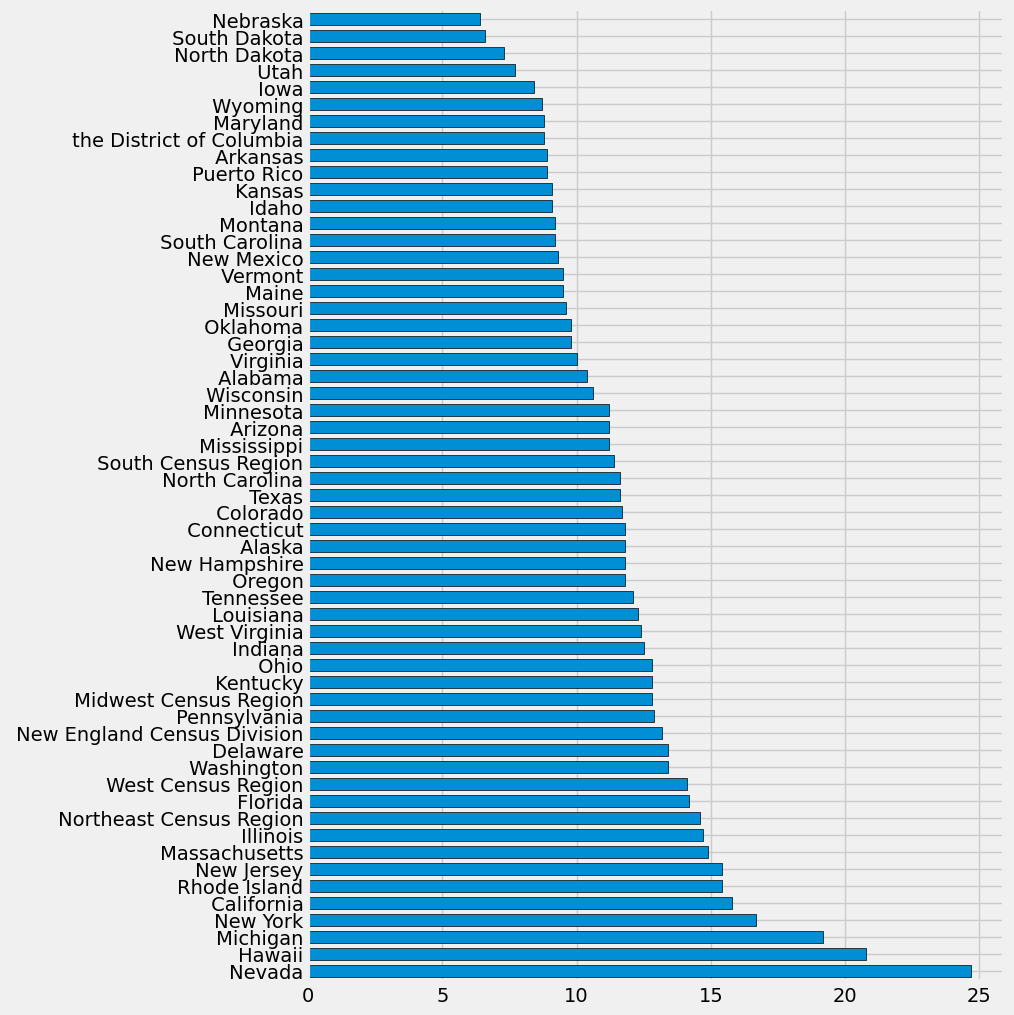

In [334]:
a=unemp_res.loc[unemp_res.index=="2020-05-1"]\
.T \
.sort_values("2020-05-1",ascending=False)\
.plot(kind="barh",figsize=(8,12),width=0.7,edgecolor='black')
a.legend().remove()
plt.show()

In [312]:
id_to_state=df['title'].str.replace('Unemployment Rate in',"").to_dict()
id_to_state['CAUR']

' California'

In [446]:
unemp_res.columns=[id_to_state[c] for c in unemp_res.columns]

In [314]:
[c for c in unemp_res.columns]

[' California',
 ' Texas',
 ' New York',
 ' Florida',
 ' Pennsylvania',
 ' Ohio',
 ' Michigan',
 ' Alabama',
 ' Massachusetts',
 ' North Carolina',
 ' Illinois',
 ' New Jersey',
 ' Georgia',
 ' Colorado',
 ' Arizona',
 ' Wisconsin',
 ' Virginia',
 ' Kentucky',
 ' South Carolina',
 ' New Mexico',
 ' Minnesota',
 ' Tennessee',
 ' Washington',
 ' Maryland',
 ' Oregon',
 ' West Virginia',
 ' Nevada',
 ' Arkansas',
 ' Oklahoma',
 ' Missouri',
 ' Alaska',
 ' Iowa',
 ' Utah',
 ' Puerto Rico',
 ' Indiana',
 ' Louisiana',
 ' Hawaii',
 ' North Dakota',
 ' Montana',
 ' the District of Columbia',
 ' Mississippi',
 ' Maine',
 ' Nebraska',
 ' Connecticut',
 ' Idaho',
 ' New Hampshire',
 ' Rhode Island',
 ' Kansas',
 ' Wyoming',
 ' Delaware',
 ' Vermont',
 ' South Dakota',
 ' Midwest Census Region',
 ' South Census Region',
 ' Northeast Census Region',
 ' West Census Region',
 ' New England Census Division']

In [306]:
df.index

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR',
       'NEUR', 'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'RIUR', 'KSUR',
       'WYUR', 'DEUR', 'VTUR', 'SDUR', 'CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR',
       'CNEWUR'],
      dtype='object', name='series id')

In [ ]:
[id_to_state[c] for c in unemp_res.columns] 

In [335]:
par=fred.search("participation rate state",filter=("frequency","Monthly"))
par=par[(par["seasonal_adjustment"]=="Seasonally Adjusted")&(unemp["units"]=="Percent")]

/var/folders/2z/f04fg9l13lvdkltmz_nd_9_h0000gn/T/ipykernel_1721/2510889575.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [340]:
ind=par['title'].str.replace('Labor Force Participation Rate for ',"").to_dict()

In [341]:
ind

{'LBSSA06': 'California',
 'LBSSA01': 'Alabama',
 'LBSSA36': 'New York',
 'LBSSA26': 'Michigan',
 'LBSSA28': 'Mississippi',
 'LBSSA48': 'Texas',
 'LBSSA12': 'Florida',
 'LBSSA21': 'Kentucky',
 'LBSSA39': 'Ohio',
 'LBSSA55': 'Wisconsin',
 'LBSSA42': 'Pennsylvania',
 'LBSSA25': 'Massachusetts',
 'LBSSA27': 'Minnesota',
 'LBSSA24': 'Maryland',
 'LBSSA54': 'West Virginia',
 'LBSSA47': 'Tennessee',
 'LBSSA23': 'Maine',
 'LBSSA17': 'Illinois',
 'LBSSA37': 'North Carolina',
 'LBSSA13': 'Georgia',
 'LBSSA22': 'Louisiana',
 'LBSSA45': 'South Carolina',
 'LBSSA08': 'Colorado',
 'LBSSA49': 'Utah',
 'LBSSA51': 'Virginia',
 'LBSSA18': 'Indiana',
 'LBSSA29': 'Missouri',
 'LBSSA34': 'New Jersey',
 'LBSSA19': 'Iowa',
 'LBSSA02': 'Alaska',
 'LBSSA53': 'Washington',
 'LBSSA04': 'Arizona',
 'LBSSA35': 'New Mexico',
 'LBSSA16': 'Idaho',
 'LBSSA05': 'Arkansas',
 'LBSSA40': 'Oklahoma',
 'LBSSA31': 'Nebraska',
 'LBSSA15': 'Hawaii',
 'LBSSA32': 'Nevada',
 'LBSSA30': 'Montana',
 'LBSSA41': 'Oregon',
 'LBSSA33'

In [345]:
allpar=[]
for myid in par.index:
    results=fred.get_series(myid)
    results=results.to_frame(name=myid)
    allpar.append(results)
par_states=pd.concat(allpar,axis=1)
par_states

,LBSSA06,LBSSA01,LBSSA36,LBSSA26,LBSSA28,LBSSA48,LBSSA12,LBSSA21,LBSSA39,LBSSA55,LBSSA42,LBSSA25,LBSSA27,LBSSA24,LBSSA54,LBSSA47,LBSSA23,LBSSA17,LBSSA37,LBSSA13,LBSSA22,LBSSA45,LBSSA08,LBSSA49,LBSSA51,LBSSA18,LBSSA29,LBSSA34,LBSSA19,LBSSA02,LBSSA53,LBSSA04,LBSSA35,LBSSA16,LBSSA05,LBSSA40,LBSSA31,LBSSA15,LBSSA32,LBSSA30,LBSSA41,LBSSA33,LBSSA50,LBSSA09,LBSSA38,LBSSA46,LBSSA20
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,58.4,64.8,65.6,64.3,52.5,59.6,62.1,63.0,66.5,63.7,56.8,65.3,67.2,62.8,65.9,64.0,60.5,61.5,64.4,69.0,60.9,59.5,60.8,63.0,57.9,59.3,64.9,69.9,71.3,62.7,62.9,65.9,63.6,64.2,62.6,64.6,65.1
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,58.3,64.7,65.5,64.2,52.4,59.4,61.9,63.0,66.3,63.6,56.6,65.2,67.0,62.6,65.8,63.9,60.3,61.4,64.3,68.4,60.7,59.2,60.5,62.8,57.8,59.2,64.9,69.6,70.8,62.5,62.7,65.6,63.4,64.1,62.4,64.4,65.0
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.9,62.9,66.2,63.5,56.5,65.0,66.8,62.5,65.6,63.8,60.3,61.4,64.2,67.8,60.6,59.1,60.3,62.7,57.7,59.1,64.8,69.6,70.5,62.4,62.5,65.6,63.2,64.0,62.3,64.4,64.9
1976-04-01,62.2,56.8,58.0,61.6,58.5,63.5,55.5,60.1,61.6,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.8,62.9,66.2,63.5,56.4,64.9,66.6,62.5,65.5,63.8,60.4,61.5,64.1,67.9,60.6,59.1,60.3,62.7,57.7,59.0,64.8,69.4,70.4,62.3,62.4,65.7,63.5,64.1,62.5,64.3,65.0
1976-05-01,62.3,56.8,58.1,61.7,58.5,63.6,55.4,60.1,61.6,65.5,58.3,64.6,65.5,64.1,52.2,59.4,61.7,63.0,66.3,63.6,56.4,64.7,66.5,62.6,65.4,63.9,60.6,61.6,64.1,67.9,60.7,59.1,60.3,62.8,57.7,59.0,64.8,69.3,70.5,62.2,62.5,66.0,63.6,64.3,62.6,64.3,65.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,62.0,57.5,61.3,62.3,54.0,64.3,58.9,57.4,62.1,65.5,62.9,65.7,67.8,65.4,55.1,59.5,59.6,64.9,60.5,61.7,58.6,57.3,67.9,68.6,66.2,62.4,63.6,64.6,66.5,64.8,63.7,62.2,57.3,62.8,57.7,63.1,68.4,59.6,62.7,62.8,63.0,65.6,65.7,64.6,68.9,67.5,66.1
2024-07-01,62.0,57.5,61.3,62.4,54.2,64.4,58.8,57.6,62.3,65.5,62.9,66.1,67.7,65.5,55.1,59.5,59.8,65.0,60.4,61.8,58.6,57.5,67.9,68.6,66.1,62.5,63.8,64.7,66.4,64.8,63.6,62.3,57.4,62.9,57.9,63.1,68.4,59.7,62.7,62.9,63.0,65.6,65.7,64.4,68.9,67.5,66.1
2024-08-01,62.1,57.5,61.3,62.3,54.4,64.4,58.6,57.7,62.3,65.5,62.7,66.3,67.7,65.5,55.1,59.5,59.9,65.0,60.3,61.8,58.6,57.6,67.9,68.5,66.0,62.7,63.9,64.8,66.3,64.9,63.5,62.3,57.5,63.1,58.0,63.1,68.3,59.6,62.7,62.9,63.0,65.6,65.7,64.2,68.8,67.5,66.2
2024-09-01,62.1,57.5,61.2,62.3,54.5,64.5,58.5,57.9,62.4,65.6,62.4,66.4,67.7,65.5,55.1,59.4,60.1,65.0,60.2,61.8,58.6,57.6,67.9,68.4,66.0,63.0,63.9,64.7,66.3,64.9,63.3,62.2,57.5,63.2,58.1,63.1,68.3,59.6,62.7,62.9,63.0,65.7,65.7,64.1,68.8,67.5,66.2


In [344]:
par_states.isna().sum()

0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
dtype: int64

In [346]:
par_states.columns=[ind[a] for a in par_states.columns]


In [355]:
par_states.shape

(586, 47)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5),sharex=True,sharey= True)
ax2=ax.twinx()
unemp_res.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax,color=color_pal[1])
par_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax2,color=color_pal[2])


<Axes: >

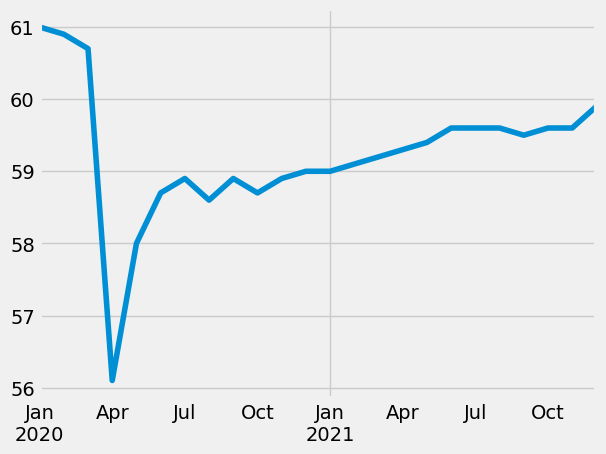

In [388]:
par_states.query('index >= 2020 and index < 2022')['New York'].plot()

In [365]:

unemp_res.index

DatetimeIndex(['1976-01-01', '1976-02-01', '1976-03-01', '1976-04-01',
               '1976-05-01', '1976-06-01', '1976-07-01', '1976-08-01',
               '1976-09-01', '1976-10-01',
               ...
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01'],
              dtype='datetime64[ns]', length=584, freq=None)

In [368]:
unemp_res.columns

Index([' California', ' Texas', ' New York', ' Florida', ' Pennsylvania',
       ' Ohio', ' Michigan', ' Alabama', ' Massachusetts', ' North Carolina',
       ' Illinois', ' New Jersey', ' Georgia', ' Colorado', ' Arizona',
       ' Wisconsin', ' Virginia', ' Kentucky', ' South Carolina',
       ' New Mexico', ' Minnesota', ' Tennessee', ' Washington', ' Maryland',
       ' Oregon', ' West Virginia', ' Nevada', ' Arkansas', ' Oklahoma',
       ' Missouri', ' Alaska', ' Iowa', ' Utah', ' Puerto Rico', ' Indiana',
       ' Louisiana', ' Hawaii', ' North Dakota', ' Montana',
       ' the District of Columbia', ' Mississippi', ' Maine', ' Nebraska',
       ' Connecticut', ' Idaho', ' New Hampshire', ' Rhode Island', ' Kansas',
       ' Wyoming', ' Delaware', ' Vermont', ' South Dakota',
       ' Midwest Census Region', ' South Census Region',
       ' Northeast Census Region', ' West Census Region',
       ' New England Census Division'],
      dtype='object')

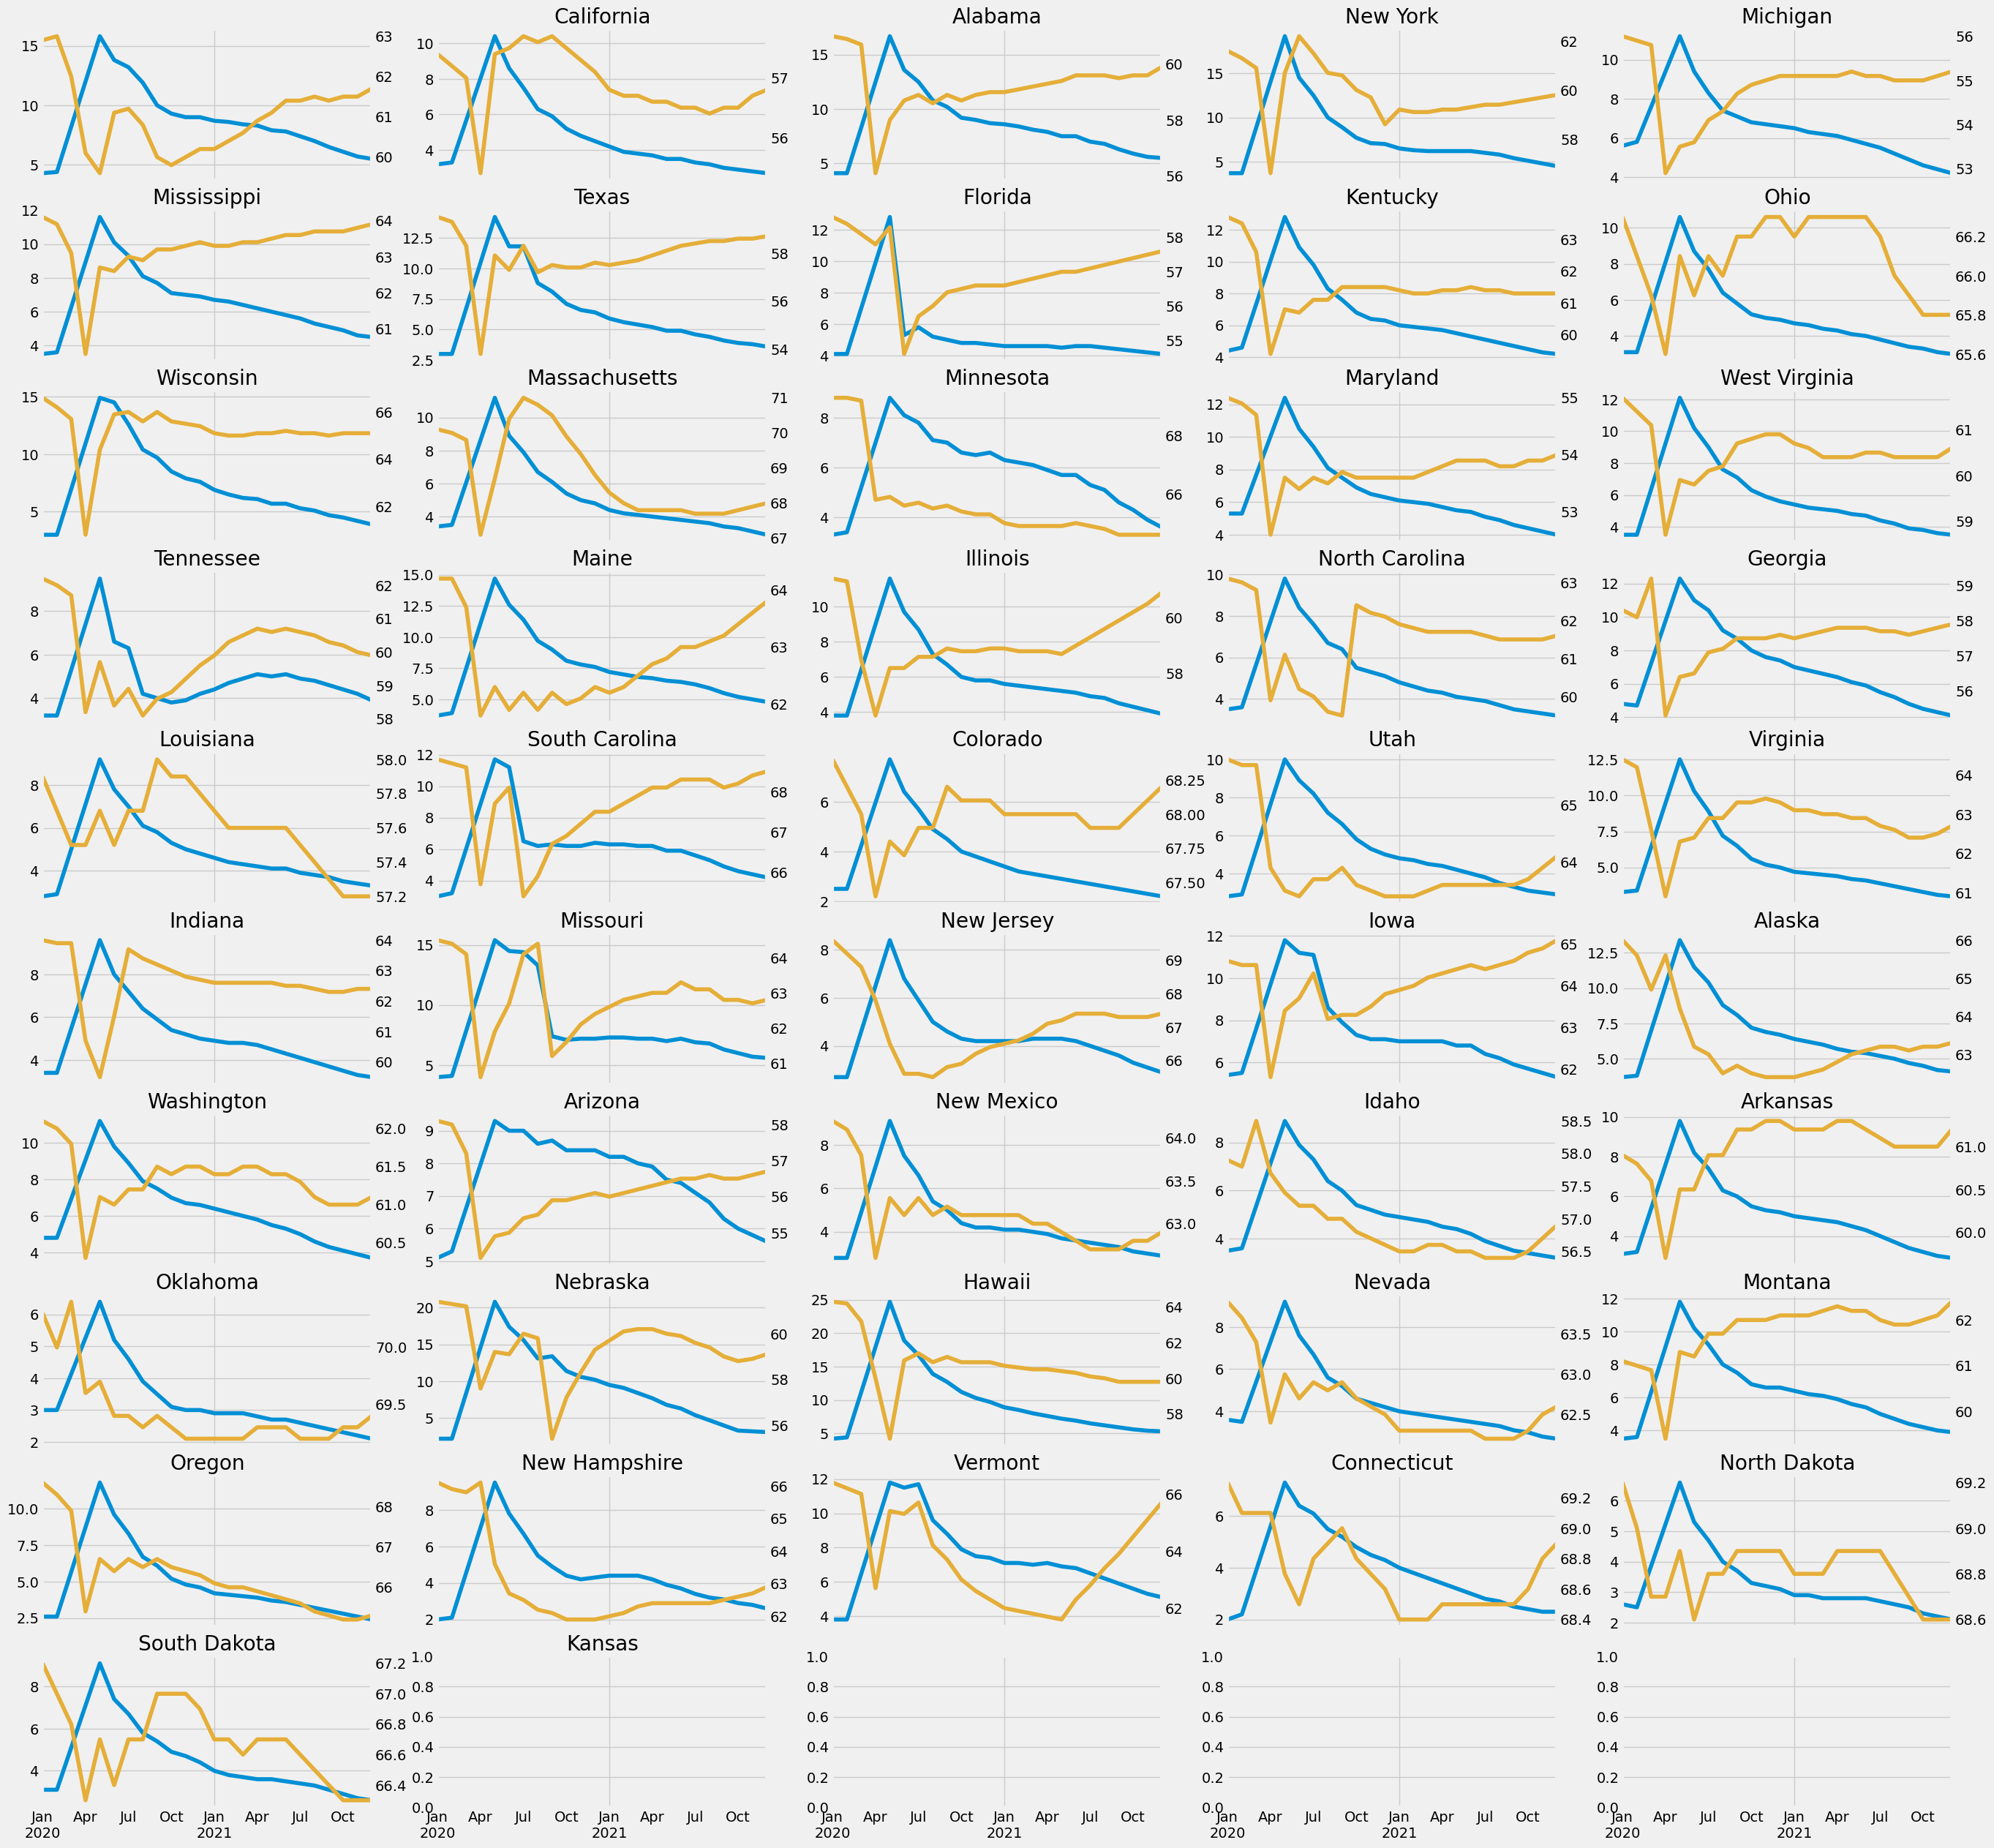

In [505]:
fig, axs = plt.subplots(12,5,figsize=(30,30),sharex=True)
axs=axs.flatten()
i=0
for state in unemp_res.columns:
    if state == 'the District of Columbia':
        continue
    ax2=axs[i].twinx()
    par_states.query('index > = 2020 and index < 2022')[state].plot(ax=ax2,color=color_pal[2])
    unemp_res.query('index > = 2020 and index < 2022')[state].plot(ax=axs[i])
    i+=1
    ax2.grid(False)
    axs[i].set_title(state)
    

# Key Findings and Insights
- **GDP Growth**: The GDP has shown a general upward trend over the years, with some periods of recession.
- **Inflation Rate**: The inflation rate has fluctuated over time, with significant peaks during economic crises.
- **Unemployment Rate**: The unemployment rate has varied, with notable increases during recessions.
- **Interest Rate**: The Federal Funds Rate has been adjusted periodically to manage economic growth and inflation.
- **Correlations**: There are notable correlations between GDP and unemployment rates, as well as between inflation and interest rates.

## Conclusion
This analysis provides a comprehensive overview of key economic indicators and their trends over time. Understanding these trends and their interrelationships can help in making informed economic decisions and policy recommendations.

## Future Work
- **Further Analysis**: Explore additional economic indicators and their impact on the economy.
- **Predictive Modeling**: Develop models to predict future trends in GDP, inflation, unemployment, and interest rates.
- **Policy Implications**: Analyze the impact of monetary and fiscal policies on these economic indicators.

This project serves as a foundation for more advanced economic analysis and decision-making.